In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/마케팅/archive (8)/Online_Sales.csv')

In [19]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [20]:
df.shape

(52924, 10)

In [21]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [23]:
df.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


In [24]:
#결측값 체크

In [25]:
df.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

<Axes: >

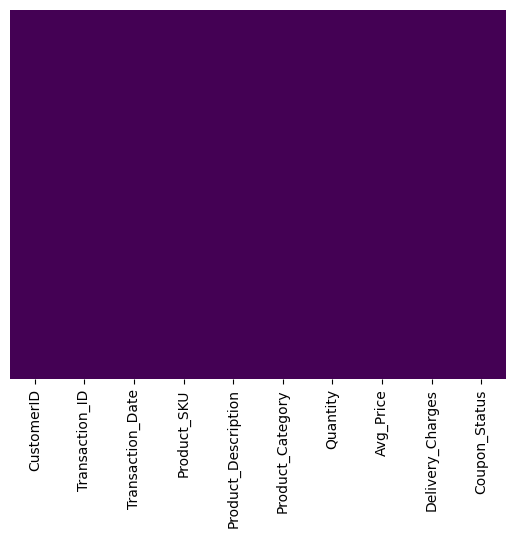

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#결측값은 다행히 없다.

In [28]:
#EDA (탐색적 분석)

In [29]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

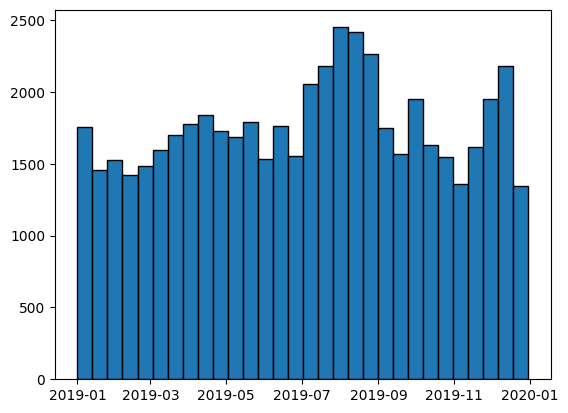

In [30]:
plt.hist(df['Transaction_Date'], bins=30, edgecolor='k')
plt.show()

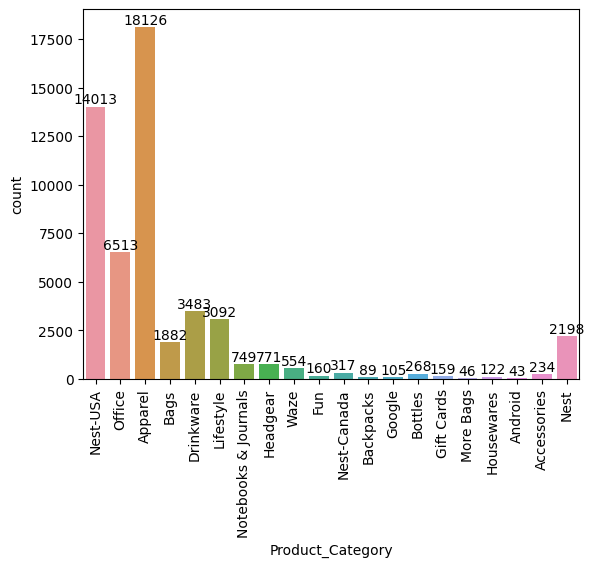

In [31]:
ax = sns.countplot(data=df,x='Product_Category')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Coupon_Status', ylabel='count'>

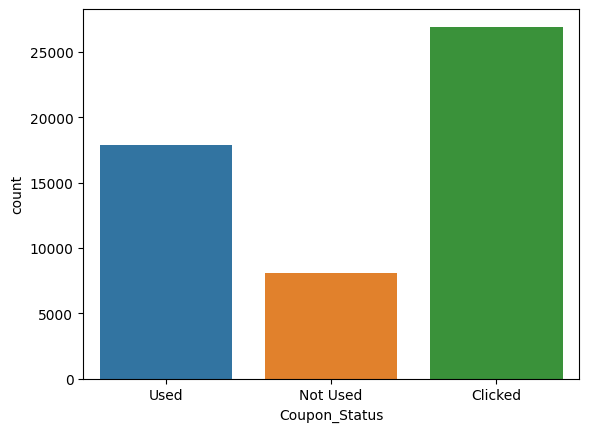

In [32]:
sns.countplot(data=df,x='Coupon_Status')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Office'),
  Text(1, 0, 'Apparel'),
  Text(2, 0, 'Drinkware'),
  Text(3, 0, 'Lifestyle'),
  Text(4, 0, 'Nest-USA'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Notebooks & Journals'),
  Text(7, 0, 'Headgear'),
  Text(8, 0, 'Nest'),
  Text(9, 0, 'Housewares'),
  Text(10, 0, 'Bottles'),
  Text(11, 0, 'Waze'),
  Text(12, 0, 'Accessories'),
  Text(13, 0, 'Fun'),
  Text(14, 0, 'Google'),
  Text(15, 0, 'Nest-Canada'),
  Text(16, 0, 'Gift Cards'),
  Text(17, 0, 'More Bags'),
  Text(18, 0, 'Backpacks'),
  Text(19, 0, 'Android')])

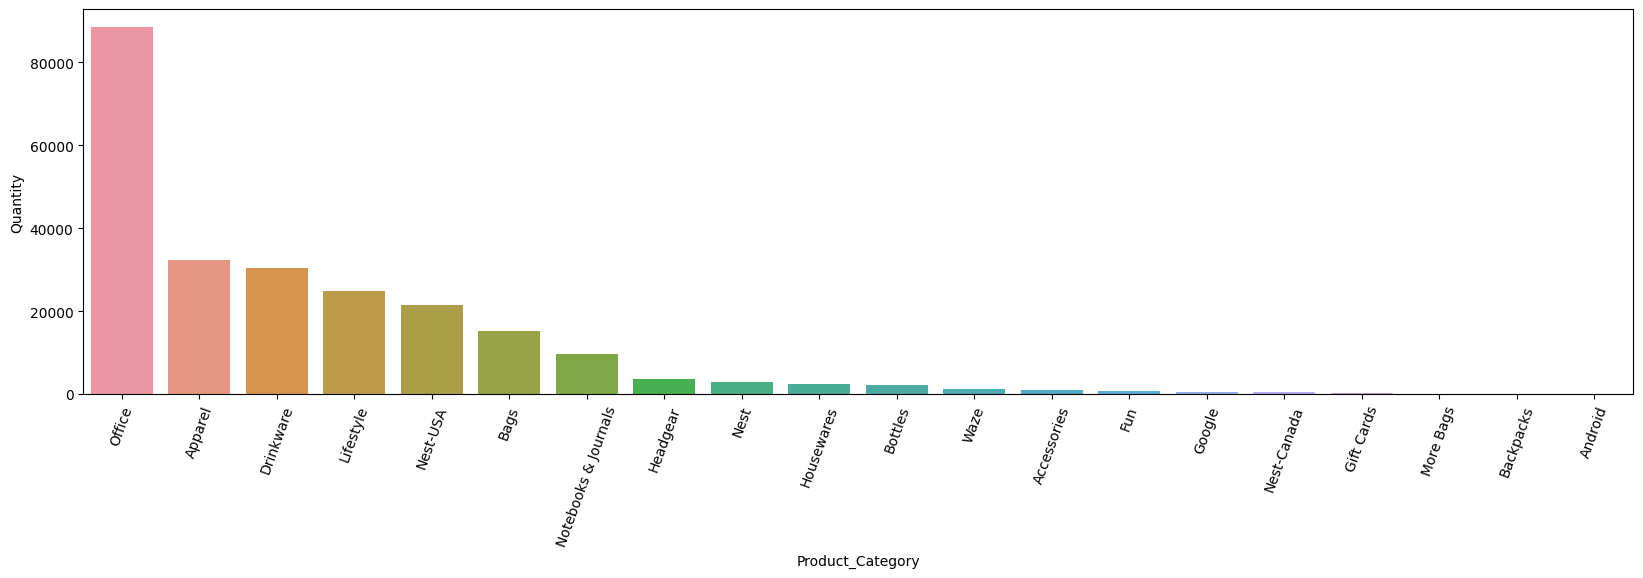

In [33]:
plt.figure(figsize=(20,5))
sales = df.groupby(['Product_Category'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(data=sales,x='Product_Category',y='Quantity')
plt.xticks(rotation=70)

<Axes: xlabel='Coupon_Status', ylabel='Quantity'>

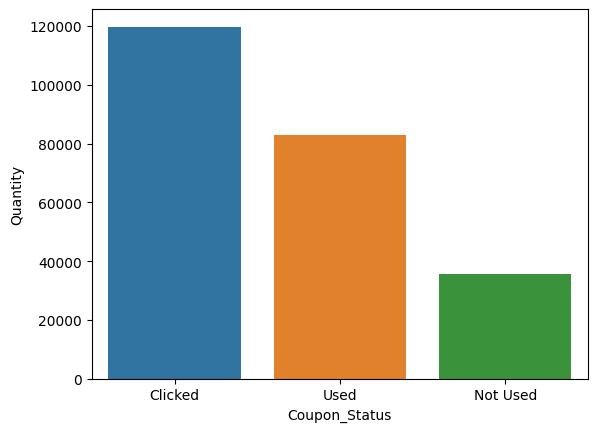

In [34]:
sales = df.groupby(['Coupon_Status'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(data=sales,x='Coupon_Status',y='Quantity')

In [ ]:
sns.jointplot(x='Age',y='Avg_Price',data=df,hue='Product_Category')